In [1]:
# Import pandas into the environment
import pandas as pd
from ydata_profiling import ProfileReport
import sweetviz as sv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

# Import marketing.csv with date columns
marketing = pd.read_csv("../Data/marketing.csv",parse_dates=["date_served","date_subscribed","date_canceled"])
#marketing.drop(columns="Unnamed: 0", inplace=True)
# Add a DoW column
marketing['DoW'] = marketing["date_subscribed"].dt.dayofweek

In [3]:
#ProfileReport(marketing)
#report = sv.analyze(marketing)
#report.show_html("output.html",open_browser=True)
#import IPython
#IPython.display.HTML('output.html')

In [5]:
marketing.isna()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,False,False,False,False,False,False,False,False,False,False,False,False,False
10033,False,False,False,False,False,False,False,False,False,True,False,False,False
10034,False,False,False,False,False,False,False,False,False,True,False,False,False
10035,False,False,False,False,False,False,False,False,False,True,False,False,False


In [4]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  DoW                  1856 non-null   float64       
dtypes: datetime64[ns](3), float64(1

In [ ]:
marketing.date_canceled.astype

In [5]:
def percentage_null_values(df):
    null_counts = df.isnull().sum()
    total_values = df.shape[0]
    percent_null_values = (null_counts / total_values) * 100
    return percent_null_values

In [6]:
percentage_null_values(marketing)

user_id                 0.000000
date_served             0.159410
marketing_channel       0.149447
variant                 0.000000
converted               0.149447
language_displayed      0.000000
language_preferred      0.000000
age_group               0.000000
date_subscribed        81.508419
date_canceled          94.251270
subscribing_channel    81.508419
is_retained            81.508419
DoW                    81.508419
dtype: float64

In [7]:
marketing.converted.value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [8]:
marketing.is_retained.value_counts()

True     1279
False     577
Name: is_retained, dtype: int64

In [9]:
marketing.describe()

,DoW
count,1856.000000
mean,2.529634
std,1.937900
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,6.000000


In [10]:
marketing.sample(5)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
1388,a100001150,2018-01-03,Instagram,control,False,English,English,30-36 years,2018-01-03,NaT,Instagram,True,2.0
6628,a100004299,2018-01-14,House Ads,personalization,False,English,English,55+ years,NaT,NaT,NaN,NaN,NaN
2340,a100000742,2018-01-07,Push,control,False,English,English,0-18 years,NaT,NaT,NaN,NaN,NaN
3703,a100002164,2018-01-24,Facebook,control,False,English,English,30-36 years,NaT,NaT,NaN,NaN,NaN
5251,a100003408,2018-01-16,Push,control,False,English,English,55+ years,NaT,NaT,NaN,NaN,NaN


In [11]:

#marketing['is_retained'] = marketing['is_retained'].astype('bool')


print(marketing['is_retained'].dtype)

object


In [12]:
marketing.sample(5)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
3616,a100002123,2018-01-07,House Ads,control,False,English,English,36-45 years,NaT,NaT,NaN,NaN,NaN
1758,a100001353,2018-01-01,House Ads,control,False,English,English,24-30 years,2018-01-19,NaT,Instagram,True,4.0
7326,a100004648,2018-01-18,House Ads,personalization,False,English,Spanish,45-55 years,NaT,NaT,NaN,NaN,NaN
8373,a100005587,2018-01-10,Facebook,personalization,False,English,English,55+ years,NaT,NaT,NaN,NaN,NaN
7978,a100005192,2018-01-05,House Ads,personalization,False,English,English,30-36 years,NaT,NaT,NaN,NaN,NaN


In [13]:
# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(marketing["language_preferred"]==marketing['language_displayed'],"Yes","No")

how many users are seeing the marketing assets each day. This is crucial to understand how effective our marketing efforts have been over the past month.

In [14]:
# Group by date_served and count number of unique user_id's
daily_users = pd.DataFrame(marketing.groupby(['date_served'])['user_id'].nunique()).reset_index()

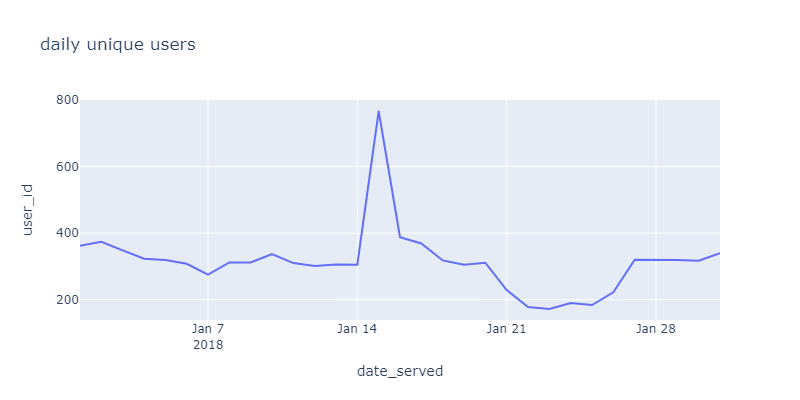

In [15]:
# Using plotly.express
import plotly.express as px
fig = px.line(daily_users, x='date_served', y="user_id",title='daily unique users')
#fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.update_layout(width=800, height=400)  # Width and height in pixels

fig.show("png")

# Marketing metrics

$$ \text{Conversion Rate} = \frac{\text{Number of People Who Convert}}{\text{Total Number of People We Marketed To}} $$

In this formula:
- $\text{Number of People Who Convert}$ represents the number of individuals who took the desired action (e.g., made a purchase).
- $\text{Total Number of People We Marketed To}$ represents the total number of individuals who were exposed to our marketing efforts.







$$ \text{Retention Rate} = \frac{\text{Number of People Who Remain Subscribed}}{\text{Total Number of People Who Converted}} $$

In this formula:
- $\text{Number of People Who Remain Subscribed}$ represents the number of individuals who continue to be subscribed after a certain period.
- $\text{Total Number of People Who Converted}$ represents the total number of individuals who initially converted or subscribed.

In [16]:
# Calculate the number of people we marketed to
total = marketing.user_id.nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"]==True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


is this a good conversion rate? This will depend heavily on your business. There is no particular number that all marketing teams are trying to reach. Instead, when you're working on a marketing team, it helps to look at historical data to determine whether a conversion rate is what you would expect.

In [17]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"]==True]["user_id"].nunique()

# Calculate the number of people who remained subscribed
marketing["is_retained"]=marketing["is_retained"].map({True:False,False:True})  # El valor de true en retained era superior alos subscribed, suponemos que los datos vienen inversos
retained = marketing[marketing["is_retained"]==True]["user_id"].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

34.48 %


# Customer segmentation

it's important to segment customers by who you're marketing to. Segmenting means breaking down metrics by specific characteristics. 

- Age
- Gender
- Location
- Past interaction(s) with the business
- Marketing channels users intracted with

we will isolate the data for English speakers and calculate the conversion rate

In [18]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers.user_id.nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers["converted"]==True].user_id.nunique()


# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [19]:
# Group by language_displayed and count unique users
total = marketing.groupby("language_displayed")["user_id"].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing["converted"]==True].groupby("language_displayed")["user_id"].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = round((subscribers/total)*100, 2)

In [20]:
language_conversion_rate=language_conversion_rate.reset_index()

In [21]:

language_conversion_rate.columns=["Language","Conversion_rate"]

In [22]:
language_conversion_rate

,Language,Conversion_rate
0,Arabic,50.00
1,English,12.92
2,German,71.62
3,Spanish,20.00


It's interesting see how low is the convertion rate on english and spanish speaker, we will investigate this

In [23]:
# Group by date_served and count unique users
total = marketing.groupby("date_served")["user_id"].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing["converted"]==True].groupby("date_served")["user_id"].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
daily_conversion_rate=daily_conversion_rate.reset_index()

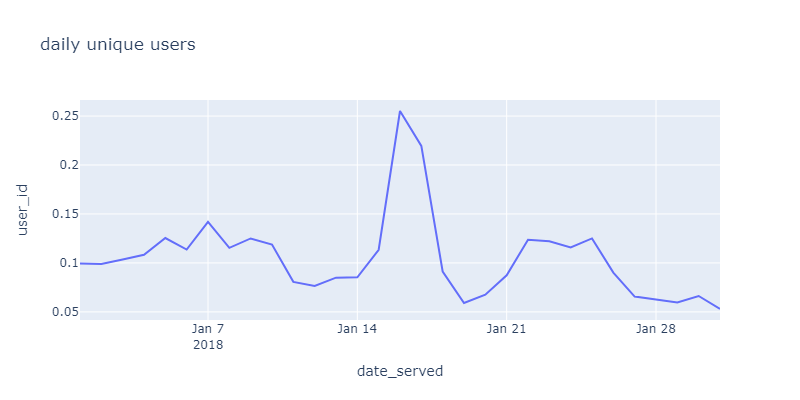

In [24]:
# Using plotly.express
import plotly.express as px
fig = px.line(daily_conversion_rate, x='date_served', y="user_id",title='daily unique users')
#fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.update_layout(width=800, height=400)  # Width and height in pixels

fig.show("png")

# Plotting campaing results

### Conversion rate

In [25]:
language_conversion_rate

,Language,Conversion_rate
0,Arabic,50.00
1,English,12.92
2,German,71.62
3,Spanish,20.00


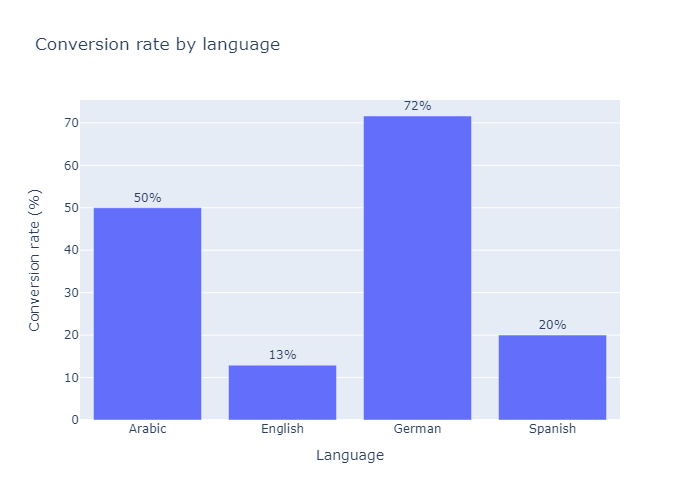

In [26]:
fig = px.bar(language_conversion_rate, x='Language', y='Conversion_rate', 
             title='Conversion rate by language',
             labels={'Conversion_rate': 'Conversion rate (%)', 'Language': 'Language'}, text='Conversion_rate')
fig.update_traces(texttemplate='%{text:.0f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


fig.show("png")

German and Arabic speakers have much higher conversion rates than English and Spanish speakers

Looking at the daily conversion rate is crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. These kinds of trends are crucial to identify for your marketing stakeholders as early as possible.

In [27]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])['user_id']\
                     .nunique()


# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

In [28]:
daily_conversion_rate.columns=["date_subscribed","conversion_rate"]


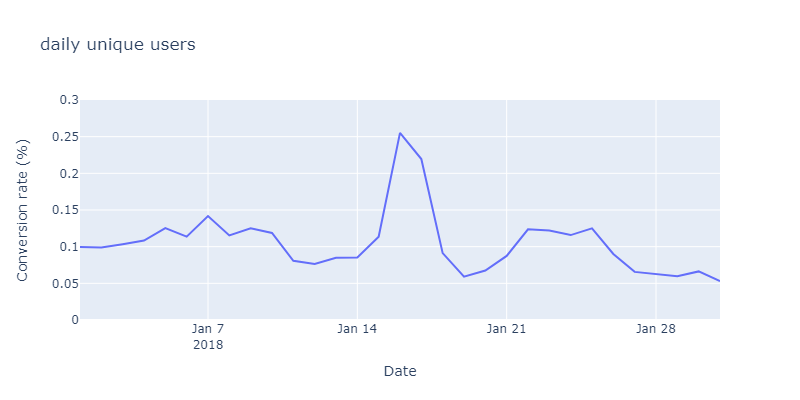

In [29]:
# Using plotly.express
import plotly.express as px
fig = px.line(daily_conversion_rate,  x='date_subscribed', y='conversion_rate',title='daily unique users')
fig.update_yaxes(range=[0, .3])  # Set the y-axis to begin at 0 and end at 30%
#fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.update_layout(xaxis_title='Date', yaxis_title='Conversion rate (%)')  # Add axis titles
fig.update_layout(width=800, height=400)  # Width and height in pixels

fig.show("png")

the conversion rate is relatively steady except for one day in January

In [30]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,False,0.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,False,0.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,False,0.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,False,0.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,False,0.0,Yes


In [31]:
channel_age_df = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

In [32]:
channel_age_df = pd.DataFrame(channel_age_df.unstack(level = 1))

In [33]:
channel_age_df

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


In [34]:
# Reset index to make 'marketing_channel' a regular column
channel_age_df = channel_age_df.reset_index()

In [35]:
channel_age_df.head()

age_group,marketing_channel,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
0,Email,93,111,120,60,63,65,53
1,Facebook,264,347,296,249,226,299,179
2,House Ads,694,761,681,699,589,678,631
3,Instagram,300,315,286,259,280,227,204
4,Push,186,145,183,86,193,82,118


In [36]:

# Melt the DataFrame to prepare for plotting
channel_age_melted = channel_age_df.melt(id_vars='marketing_channel', var_name='Age Group', value_name='Users')

In [37]:
channel_age_melted.head()

,marketing_channel,Age Group,Users
0,Email,0-18 years,93
1,Facebook,0-18 years,264
2,House Ads,0-18 years,694
3,Instagram,0-18 years,300
4,Push,0-18 years,186


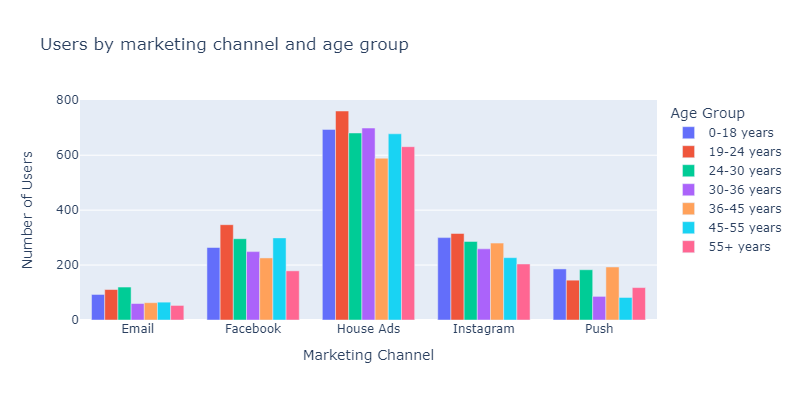

In [38]:
# Create a grouped bar chart using Plotly Express
fig = px.bar(channel_age_melted, x='marketing_channel', y='Users', color='Age Group', barmode='group',
             title='Users by marketing channel and age group',
             labels={'Users': 'Number of Users', 'marketing_channel': 'Marketing Channel', 'Age Group': 'Age Group'})
fig.update_layout(width=800, height=400)  # Width and height in pixels
# Show the plot
fig.show("png")

 email is not reaching older age groups, and Facebook is not reaching many people under 18. House ads keep the mayor poblation, and push notification not seems a lot of users

lets see whose channel had the best retention rate from the campaign. 

In [39]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     "subscribing_channel"])["user_id"].nunique()


In [40]:
retention_subs = marketing[marketing["is_retained"]==True].groupby(['date_subscribed', 
                                                                    "subscribing_channel"])["user_id"].nunique()

In [41]:
retention_rate = retention_subs/retention_total

In [42]:
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))


In [43]:
retention_rate_df.head()

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,NaN,0.125000,0.312500,0.250000,NaN
2018-01-02,0.25,NaN,0.411765,0.375000,NaN
2018-01-03,1.00,0.200000,0.352941,0.090909,0.333333
2018-01-04,0.50,0.333333,0.533333,0.500000,1.000000
2018-01-05,NaN,0.428571,0.500000,0.363636,NaN


In [44]:
retention_rate_df = retention_rate_df.reset_index()

In [45]:


# Melt the DataFrame for plotting with Plotly Express
retention_rate_melted = retention_rate_df.melt(id_vars=retention_rate_df.columns[0], 
                                               var_name='Subscribing Channel', 
                                               value_name='Retention Rate')


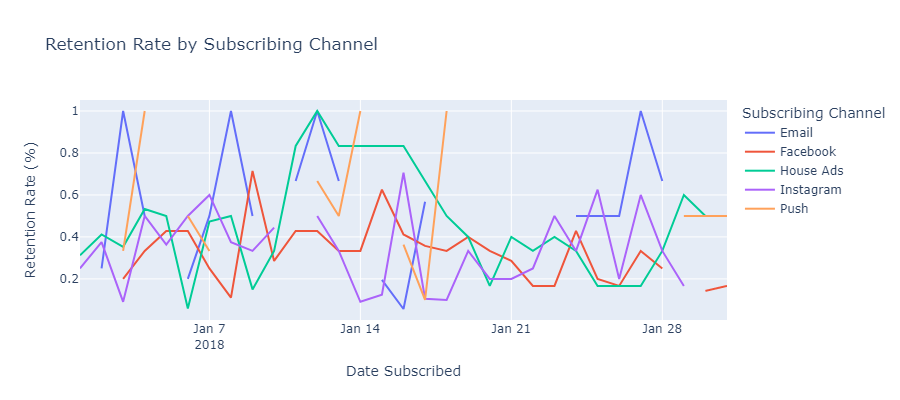

In [46]:

# Create a line chart
fig = px.line(retention_rate_melted, 
              x=retention_rate_df.columns[0], 
              y='Retention Rate', 
              color='Subscribing Channel',
              title='Retention Rate by Subscribing Channel',
              labels={retention_rate_df.columns[0]: 'Date Subscribed', 'Retention Rate': 'Retention Rate (%)'})

# Add layout adjustments here as needed
fig.update_layout(xaxis_title='Date Subscribed', yaxis_title='Retention Rate (%)', legend_title='Subscribing Channel')
fig.update_layout(width=900, height=400)  # Width and height in pixels
fig.show("png")


In [47]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [48]:
age_group_conv = conversion_rate(marketing, ['date_served', "age_group"])


In [49]:
age_group_conv=age_group_conv.reset_index()
age_group_conv.columns=["date_served","age_group","conversion_rate"]

In [50]:
age_group_conv.head()

,date_served,age_group,conversion_rate
0,2018-01-01,0-18 years,0.155172
1,2018-01-01,19-24 years,0.196721
2,2018-01-01,24-30 years,0.105263
3,2018-01-01,30-36 years,0.040816
4,2018-01-01,36-45 years,0.042553


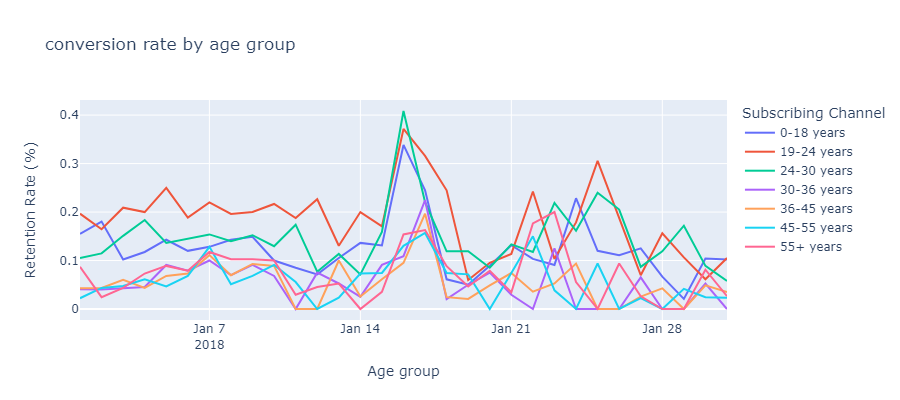

In [51]:

# Create a line chart
fig = px.line(age_group_conv, 
              x=age_group_conv.columns[0], 
              y='conversion_rate', 
              color='age_group',
              title='conversion rate by age group')

fig.update_layout(xaxis_title='Age group', yaxis_title='Retention Rate (%)', legend_title='Subscribing Channel')
fig.update_layout(width=900, height=400)  
fig.show("png")

### Funtions to fast analysis

In [52]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv / column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)

    # Reset the index to make all grouping columns and conversion rate as columns in the DataFrame
    conversion_rate = conversion_rate.reset_index()

    # Rename the last column to "conversion rate"
    conversion_rate = conversion_rate.rename(columns={conversion_rate.columns[-1]: 'conversion rate'})

    return conversion_rate


In [53]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

In [54]:
age_group_conv = conversion_rate(marketing,["date_served","age_group"])

In [55]:
age_group_conv.head()

,date_served,age_group,conversion rate
0,2018-01-01,0-18 years,0.155172
1,2018-01-01,19-24 years,0.196721
2,2018-01-01,24-30 years,0.105263
3,2018-01-01,30-36 years,0.040816
4,2018-01-01,36-45 years,0.042553


In [56]:
import plotly.express as px

def graph_conversion(df, x_column, y_column, color_column,title_variable):
    # Check if a color column is provided
    if color_column:
        # Create a line chart with color differentiation
        fig = px.line(df, 
                      x=x_column, 
                      y=y_column, 
                      color=color_column,
                      title=title_variable)
        legend_title = color_column
    else:
        # Create a simple line chart without color differentiation
        fig = px.line(df, 
                      x=x_column, 
                      y=y_column,
                      title=title_variable)
        legend_title = None

    # Update layout with appropriate titles
    fig.update_layout(xaxis_title=x_column, yaxis_title='Conversion Rate', legend_title=legend_title)
    fig.update_layout(width=900, height=400)  # Width and height in pixels
    fig.show("png")


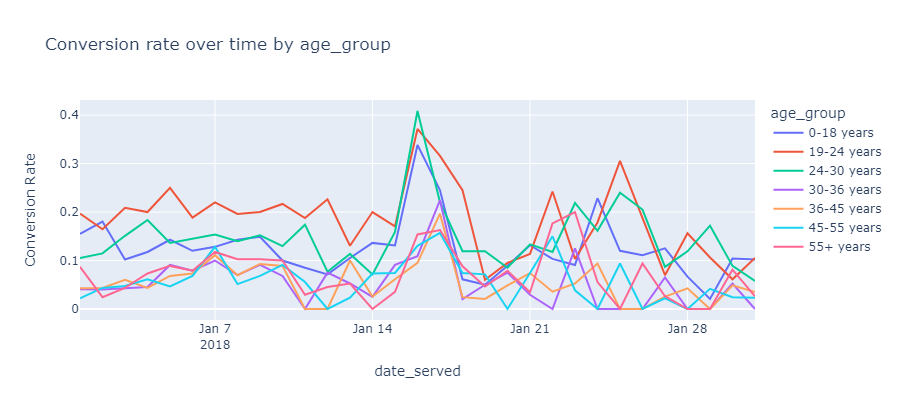

In [57]:
# Example usage of the function without specifying a color column
graph_conversion(df=conversion_rate(marketing, ["date_served","age_group"]), x_column='date_served', y_column='conversion rate',color_column="age_group",title_variable="Conversion rate over time by age_group")

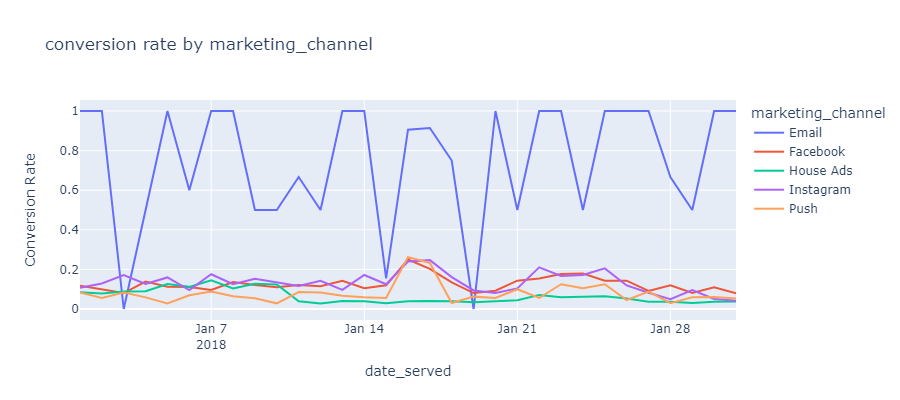

In [58]:
# Example usage of the function without specifying a color column
graph_conversion(df=conversion_rate(marketing, ["date_served","marketing_channel"]), x_column='date_served', y_column='conversion rate',color_column="marketing_channel",title_variable="conversion rate by marketing_channel")

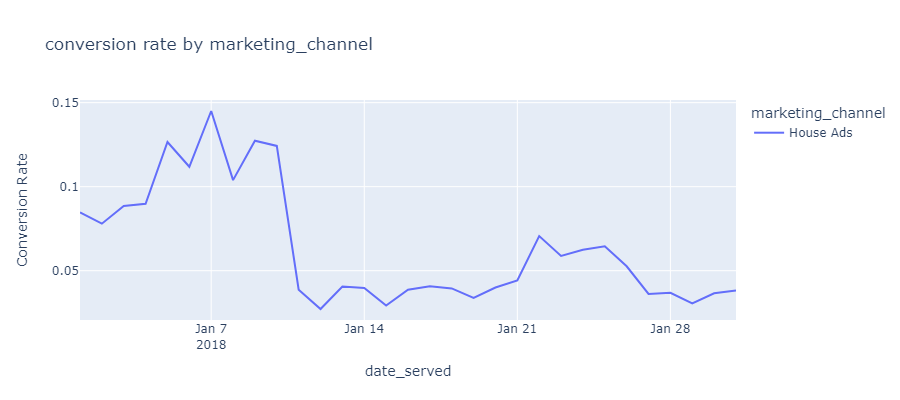

In [59]:
graph_conversion(df=conversion_rate(marketing[marketing["marketing_channel"]=="House Ads"], ["date_served","marketing_channel"]), x_column='date_served', y_column='conversion rate',color_column="marketing_channel",title_variable="conversion rate by marketing_channel")

it seems that House Ads has decrease on Jan 11

we will begin by checking whether users are more likely to convert on weekends compared with weekdays and determine if that could be the cause for the changing house ads conversion rate.

In [60]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing["date_served"].dt.day_of_week

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing[marketing["converted"]==True], ['DoW_served', 'marketing_channel'])

In [61]:
DoW_conversion

,DoW_served,marketing_channel,conversion rate
0,0.0,Email,1.0
1,0.0,Facebook,1.0
2,0.0,House Ads,1.0
3,0.0,Instagram,1.0
4,0.0,Push,1.0
5,1.0,Email,1.0
6,1.0,Facebook,1.0
7,1.0,House Ads,1.0
8,1.0,Instagram,1.0
9,1.0,Push,1.0


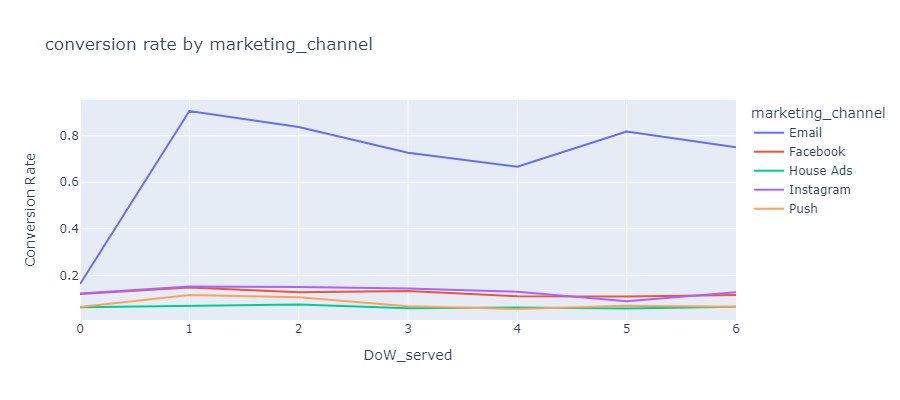

In [62]:
graph_conversion(df=conversion_rate(marketing, ['DoW_served', 'marketing_channel']), x_column='DoW_served', y_column='conversion rate',color_column="marketing_channel",title_variable="conversion rate by marketing_channel")

 As we can see email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday. we will investigate further

In [63]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing["marketing_channel"]=="House Ads"]

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,["date_served","language_displayed"])



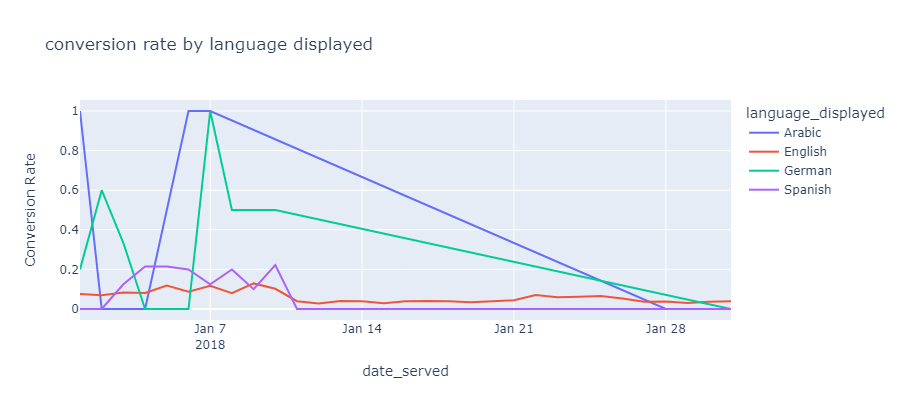

In [64]:
graph_conversion(df=conv_lang_channel, x_column='date_served', y_column='conversion rate',color_column="language_displayed",title_variable="conversion rate by language displayed")

We can see that the english and spasish conversion rate  drops around the 11th, like house ads

The house ads team is concerned because they've seen their conversion rate drop suddenly in the past few weeks. 

we firmed that conversion is down because we  noticed a pattern around language preferences.

As a data scientist, its out job  to provide our  marketing stakeholders with as specific feedback as possible as to what went wrong to maximize their ability to correct the problem. It is vital that we not only say "looks like there's a language problem," but instead identify what the problem is specifically so that the team doesn't repeat their mistake.

In [65]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(["date_served","is_correct_lang"])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

C:\Users\guill\AppData\Local\Temp\ipykernel_9472\1989897955.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:

# Print results
language_check_df.head(15)

is_correct_lang,No,Yes
date_served,,
2018-01-01,2.0,189.0
2018-01-02,3.0,247.0
2018-01-03,0.0,220.0
2018-01-04,0.0,168.0
2018-01-05,0.0,160.0
2018-01-06,1.0,151.0
2018-01-07,2.0,130.0
2018-01-08,0.0,154.0
2018-01-09,0.0,157.0


the English conversion rate drops around the 11th, also the incorrect language conversion rate appear to increase on 11th

In [67]:
# Divide the count where language is correct by the row sum
language_check_df['pct_conversion_correct'] = language_check_df['Yes']/language_check_df.sum(axis=1)
language_check_df['pct_conversion_incorrect'] = language_check_df['No'] / language_check_df.sum(axis=1)

fig = px.line(language_check_df, x=language_check_df.index.values, y=["pct_conversion_correct","pct_conversion_incorrect"], title='conversion rate percentage')
fig.show()

Now that we've determined that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

We will determinate the conversion rate before 11th to see the impact

In [68]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv[lang_conv["language_displayed"]=='Spanish']["conversion rate"].values[0]/lang_conv[lang_conv["language_displayed"]=='English']["conversion rate"].values[0]
arabic_index = lang_conv[lang_conv["language_displayed"]=='Arabic']["conversion rate"].values[0]/lang_conv[lang_conv["language_displayed"]=='English']["conversion rate"].values[0]
german_index = lang_conv[lang_conv["language_displayed"]=='German']["conversion rate"].values[0]/lang_conv[lang_conv["language_displayed"]=='English']["conversion rate"].values[0]

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [69]:
lang_conv

,language_displayed,conversion rate
0,Arabic,0.500000
1,English,0.099093
2,German,0.444444
3,Spanish,0.166667


In [70]:
lang_conv[lang_conv["language_displayed"]=='Spanish']["conversion rate"].values[0]/lang_conv[lang_conv["language_displayed"]=='English']["conversion rate"].values[0]


1.681924882629108

In [71]:
# Group house_ads by date and language
converted = house_ads.groupby(["date_served","language_preferred"])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

In this step, we will create a new DataFrame that you can perform calculations on to determine the expected number of subscribers. This DataFrame will include how many users prefer each language by day. Once you have the DataFrame, you can begin calculating how many subscribers you would have expected to have had the language bug not occurred.

In [72]:
converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3  
2018-01-06               2  
2018-01-07               1  
2018-01-08               2  
2018-01-09               1  
2018-01-10               4  
2018-01-11               0  
2018-01-12               1  
2018-01-13               0  
2018-01-14               0  
2018-01-15               0  
2018-01-16               0  
2018-01-17               4  
2018-01-18               0  
2018-01-19               0  
2018-01-20               0  
2018-01-21               0  
2018-01-22               0  
2018-01-23               0  
2018-01-24               0  
2018-01-25               0  
2018-01-26               2  
2018-01-27               1  
2018-01-28               2  
2018-01-29               0  
2018-01-30               2  
2018-01-31               1

we will estimate what daily conversion rates should have been if users were being served the correct language.

In [73]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31',('converted','English')]

# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted_df['expected_german_conv'] = converted_df['expected_german_rate']/100*converted_df[('user_id','German')]

In [74]:
converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-01               0               NaN                   NaN   
2018-01-02               0               NaN                   NaN   
2018-01-03               1               NaN                   NaN   
2018-01-04               3               NaN                   NaN   
2018-01-05               3               NaN                   NaN   
2018-01-06               2               NaN                   NaN   
2018-01-07               1               NaN                   NaN   
2018-01-08               2               NaN                   NaN   
2018-01-09               1               NaN                   NaN   
2018-01-10               4               NaN                   NaN   
2018-01-11               0                 6             10.091549   
2018-01-12               1                 3              5.045775   
2018-01-13               0                 5              8.409624   
2018-01-14               0                 6             10.091549   
2018-01-15               0                 6             10.091549   
2018-01-16               0                 6             10.091549   
2018-01-17               4          

 Now, we will assess how many subscribers you lost due to the language discrepancy.

It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. 

In [75]:
# Use .converted_df to slice only the relevant dates
converted = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df['expected_spanish_conv'].sum() + converted_df['expected_arabic_conv'].sum() + converted_df['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

-3.855856807511735


In [76]:
actual_subs

62

# A/B testing

A/B testing refers to a randomized experiment which evaluates which variant performs better.

- What it's the desire outcome of the test? what is out hypothesis
- what is the metric we are tryinh to impact (i.e., page views, conversion)
- we will get enough trafic to our site to reach statistical significance and make a decision in timely manner

A big benefit of running A/B tests is we can be confident that the increase in the relevant metrics was due to the action we took in the test.

The focus of this section  will be the A/B test that was run where half the emails were generic upsells to our product while the other half contained personalized messaging around individual usage of our site.

Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

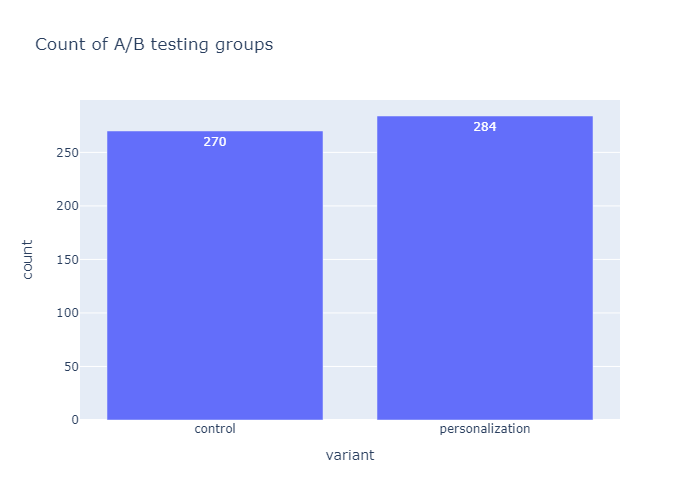

In [77]:
# Subset the DataFrame
email = marketing[marketing["marketing_channel"]=="Email"]

alloc = email.groupby("variant")["user_id"].nunique().reset_index()
alloc.columns=["variant","count"]

fig=px.bar(alloc,x="variant",y="count",title="Count of A/B testing groups",text="count")
fig.show("png")

There's a slight difference in allocation, but it's within the expected range so we can continue with out analysis.

### Comparing conversion rates


Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control

In [78]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             "variant"])["converted"].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df["control"].dropna()

# Drop missing values from the personalization column
personalization =  subscribers_df["personalization"].dropna()

In [79]:
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


we can see that personalization converted at higher rate than control

# Calculating lift(delta) & significance testing


$$ \text{Lift} = \frac{\text{Treatment conversion rate - Control conversion rate}}{\text{Control conversion rate}} $$





In [80]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


As we can see, there's a large lift, but are out results statistically significant? 

In [81]:
from scipy import stats

In [82]:
control.head()

user_id
a100000687    False
a100000688     True
a100000689     True
a100000690     True
a100000691     True
Name: control, dtype: object

The t-test gives us a t-statistic and a p-value which allows us to estimate the likelihood of finding a result at least as extreme as the treatment in our test. While it depends on sample size and the test, typically a t-statistic of 1.96 evaluates to a p-value of 0.05, which translates to a 95% significance level, a commonly used threshold for significance tests.

In [84]:
stats.ttest_ind(pd.to_numeric(control),pd.to_numeric(personalization))

TtestResult(statistic=-2.734329944750507, pvalue=0.006451487844694182, df=552.0)

The personalization results are highly statistically significant. 

## A/B testing pitfall

One of the most common pitfalls in A/B testing is assuming that a treatment equally affects everyone in a population.

Just like with any other kind of marketing, some treatments are particularly effective on users of a specific engagement level, age, race, or any other of a number of factors. It is important to break down results by various demographics in order to obtain a holistic understanding of the impact of the test. Not all customers are alike!

In the previous lesson, we observed that your personalization experiment is highly statistically significant. However, when running experiments, it is important to check how new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others.

In [87]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(pd.to_numeric(control),pd.to_numeric(personalization)), '\n\n')

In [88]:
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: TtestResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001, df=8.0) 


English
lift: 39.0%
t-statistic: TtestResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503, df=486.0) 


German
lift: -1.62%
t-statistic: TtestResult(statistic=0.19100834180787182, pvalue=0.8494394170062677, df=42.0) 


Spanish
lift: 166.67%
t-statistic: TtestResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524, df=10.0) 




c:\Users\guill\Desktop\GitHub\Projects\Enviroments\General\general_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



In [89]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: TtestResult(statistic=-2.966044912142212, pvalue=0.003872449439129706, df=89.0) 


19-24 years
lift: 106.24%
t-statistic: TtestResult(statistic=-3.0317943847866697, pvalue=0.00306238361146892, df=105.0) 


24-30 years
lift: 161.19%
t-statistic: TtestResult(statistic=-3.861539544326876, pvalue=0.00018743381094867335, df=114.0) 


30-36 years
lift: -100.0%
t-statistic: TtestResult(statistic=3.185906464414798, pvalue=0.0023238487431765337, df=58.0) 


36-45 years
lift: -85.23%
t-statistic: TtestResult(statistic=2.431790127931851, pvalue=0.017975686009788258, df=61.0) 


45-55 years
lift: -72.22%
t-statistic: TtestResult(statistic=2.0654991273179326, pvalue=0.04306233968820123, df=62.0) 


55+ years
lift: -100.0%
t-statistic: TtestResult(statistic=3.326565456420339, pvalue=0.0016358623456360468, df=51.0) 




Great work! we found that personalization was extremely effective for younger groups but less effective than the control for older groups. 

One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.